

# Project: The No-show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on whether or not patients show for their appointment.

> This project focuses on analyzing the dataset to better understand and describe the patients whom have showed up for appointments. Also, to visualize patients' distribution and provide further descriptive insights.

#### Research Question
We would like to understand if there are differences in the patients who showed up for the appointment and those who didn't.
We would try to anser this question by looking at the variables below:

* Proportion of patients who showed up across time difference (scheduled date and appointment date), can we notice a difference ?
* Is age associated with showing up ?
* Proportion of patients who showed up across gender
* Proportion of patients who showed up across text message (received SMS or not)

In [1]:
# Importing necessary libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from itertools import product
from statsmodels.stats.weightstats import ztest as ztest
import math
%matplotlib inline
sns.set_style("darkgrid")


## Data description
> The dataset has 14 columns and 110527 observations. Dataset has no missing values, all columns have complete records and no duplicted record.


**Columns Description**
  *  PatientId - refers to the unique identification for individual patients.
  *  AppointmentID - refers to the unique appointment number.
  *  Gender - refers to the sex of the patient (Male / Female)
  *  ScheduledDay - refers to the day the appointment was scheduled
  *  AppointmentDay - referes to the appointment day
  *  Age - refers to the age of the patient
  *  Neighbourhood - refers to where the appointment would take place
  *  Scholarship - refers to if patient is a beneficiary of a social welfare program in Brazil (True/ False)
  *  Hypertension - refers to if patient suffers from hypertension (True/ False)
  *  Diabetes - refers to if patient suffers from diabetes (True/ False)
  *  Alcoholism - refers to if patient takes alcholol (True/ False)
  *  Handicap - refers to if patient is handicapped (True/ False)
  *  SMS_received - referes atleast one message was sent (True / False)
  *  No-show - refers to patient showing up or not 
  
##### True is coded as 1 and 0 for false
  



<a id='wrangling'></a>
# Data Wrangling and Cleaning


In [2]:
# loading the dataset into python
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

# checking the shape of the data
print("The dataset has {} columns and {} rows".format(df.shape[1],df.shape[0]))
print("There are {} duplicated rows in the data".format(df.duplicated().sum())) # to check for duplicated rows

The dataset has 14 columns and 110527 rows
There are 0 duplicated rows in the data


In [3]:
df.info() # Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.head() # first 5 rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
print(df.isnull().sum()) # checking for null records 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


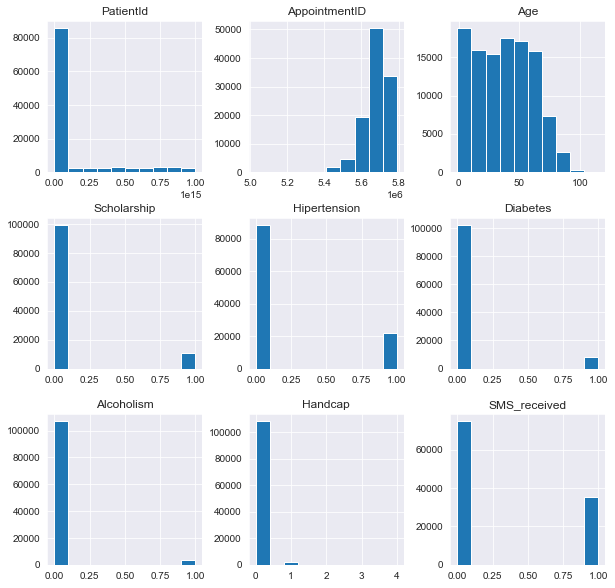

In [6]:
# Plotting the distribution of all columns
df.hist(figsize= (10,10));

From our checks, there are no duplicated and missing values in the dataset. Hence, the next step is to proceed to data wrangling.

### Data Cleaning

####  Cleaning Steps 
* Renaming wrongly spelt columns
* dropping columns that have very high or low dimensionality (provide little to our analysis, this specifically refers to the appointmentID column)
* Converting the days to a daytime format

In [7]:
# Rename wrongly spelt columns
df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'}, inplace = True)

In [8]:
# # Dropping columns with high dimensionality
df.drop(columns = ['AppointmentID'], inplace = True)

In [9]:
# Changing columns of date to a datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### Creating a date_diff column 

Create a date_diff column which is the difference in the scheduled day and appointment day. We can visualize the variations in patients showing up across the difference in scheduled day and appointment day

We would also cut the "Date_diff" into bins, which would allow us categorize the time difference

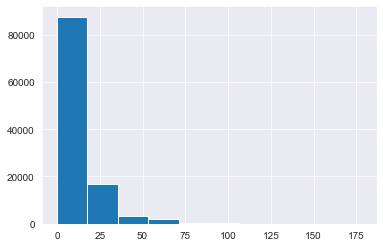

In [10]:
# Calculates the difference in the scheduled and appointment date
df['Date_diff'] = df['AppointmentDay'] - df['ScheduledDay']

# Converting the date_diff columns to days 
df['Date_diff'] = df['Date_diff'] / np.timedelta64(1, 'D')
df['Date_diff'] = np.floor(df['Date_diff'].abs())
df.Date_diff.hist(bins=10);

In [11]:
# Creating a Duration column
df['Date_diff'].describe()

# Bin edges that will be used to "cut" the data into groups
bin_edges = [-0.5, 0.0, 7.0, 14.0, 30.0, 178.0]

# Labels for the time differences
bin_names = ['Same day','Less than a week' ,'Less than 2 weeks' ,'Less than a month','Greater than a month']

# Creates duration column
df['Duration'] = pd.cut(df['Date_diff'], bin_edges, labels=bin_names)
df['Duration'].value_counts()

Same day                43776
Less than a week        29309
Less than a month       16540
Less than 2 weeks       11196
Greater than a month     9706
Name: Duration, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

This is where we show the proportions across our variable of interests.

In [12]:
# Count of patients showing up for the appointment
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [13]:
# Proportion of patients 
df['No_show'].value_counts() / len(df)

No     0.798067
Yes    0.201933
Name: No_show, dtype: float64

> Only 20% of patients showed up for their appointment. Majority (88,208) didn't show up for their appointments.

### Does time difference between scheduled date and appointment date affect show up ?

In [14]:
# Proportion of time difference
df.Duration.value_counts() / len(df)

Same day                0.396066
Less than a week        0.265175
Less than a month       0.149647
Less than 2 weeks       0.101297
Greater than a month    0.087816
Name: Duration, dtype: float64

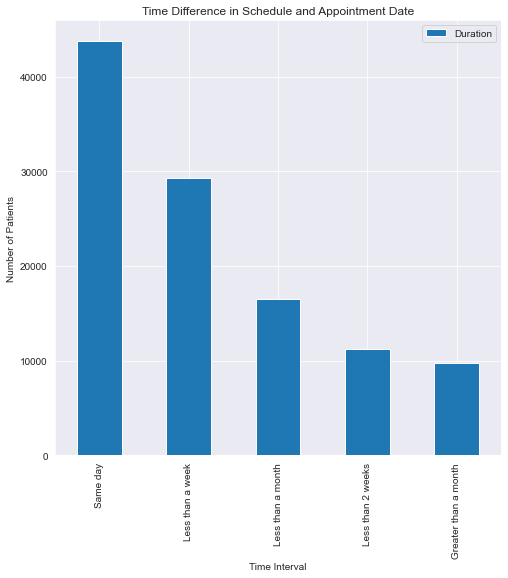

In [15]:
# A bar chart of the time inhterval between scheduled and appointment date
df.Duration.value_counts().plot(kind = 'bar', title = "Time Difference in Schedule and Appointment Date",
                                xlabel = 'Time Interval', ylabel = 'Number of Patients', figsize=(8,8))
plt.legend();

Majority of appointment were booked on the same day (40%), 26% were scheduled within 7 days, 10% were scheduled within 14 days, 15% within a month and 9% had more than a month difference from scheduled date to appointment date.


In [16]:
def group(col):
    """
    This function groups the specified column of interest with the No_show column in the dataset
    It takes only one argument
    """
    ax = df.groupby([col, 'No_show'])['Age'].count()
    return ax

In [17]:
# Calculating the proportion within groups
counts = group('Duration')
totals = df.groupby('Duration').count()['Age']
duration_prop = counts / totals 
duration_prop = pd.DataFrame(duration_prop)
duration_prop

Age
Duration             No_show          
Same day             No       0.933639
                     Yes      0.066361
Less than a week     No       0.749770
                     Yes      0.250230
Less than 2 weeks    No       0.687746
                     Yes      0.312254
Less than a month    No       0.674788
                     Yes      0.325212
Greater than a month No       0.669792
                     Yes      0.330208

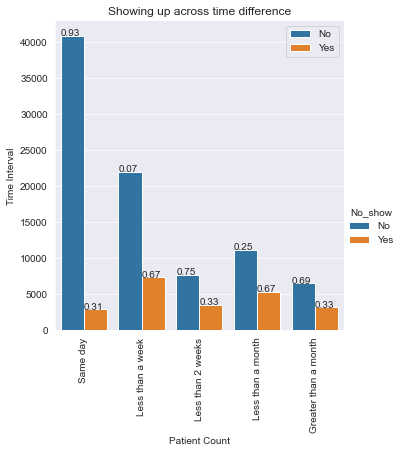

In [18]:
# Plotting a countplot visual
Duration_order = ['Same day','Less than a week' ,'Less than 2 weeks','Less than a month' ,'Greater than a month'] 
hue_order = ['No', 'Yes']
bar_order = product(Duration_order, hue_order)

catp = sns.catplot(data=df, kind='count', 
                   x='Duration', hue='No_show',
                   order = Duration_order, 
                   hue_order = hue_order )
plt.xticks(rotation=90)
plt.title("Showing up across time difference")
plt.xlabel("Patient Count")
plt.ylabel("Time Interval")
plt.legend();

# The code below is to add the proportions to the bar.
spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    Duration_total = len(df[df['Duration']==spot[1][0]])
    Duration_No_show_total = len(df[(df['Duration']==spot[1][0]) & 
        (df['No_show']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(Duration_No_show_total/Duration_total))

> The difference in time from scheduled and appointment date provide insights to understand the number of patients who came for their appointment. 
* A longer time difference between the scheduled time and appointment date is associated with a higher proportion of turn up
* Lower turn out has been noticeable with a shorter time difference, as proportion of not making the appointment increases.

Guide for this visualization https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

### Is Age associated with showing up ?

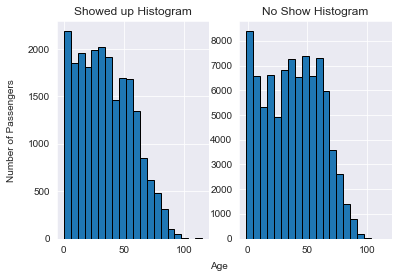

In [19]:
fig, axes = plt.subplots(1,2)

df.Age[df.No_show == 'Yes'].hist(label = 'Showed', bins = 20,ax=axes[0],edgecolor = "Black")
df.Age[df.No_show == 'No'].hist(label = 'No show', bins = 20, ax=axes[1], edgecolor = "Black")

axes[0].set_title('Showed up Histogram')
axes[1].set_title('No Show Histogram');

fig.text(0.5, 0.02, 'Age', ha='center');
fig.text(0.01, 0.5, 'Number of Passengers', va ='center', rotation='vertical');

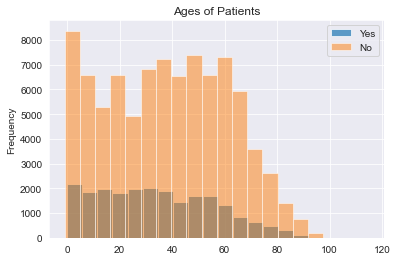

In [20]:
fig, ax = plt.subplots()

x = df.Age[df.No_show == 'Yes']
y = df.Age[df.No_show == 'No']

plt.hist(x, alpha=0.7, bins = 20, label='Yes')
plt.hist(y, alpha=0.5, bins = 20, label='No')
plt.legend(loc='upper right')
ax.set_title('Ages of Patients')
ax.set_ylabel("Frequency");

There is a similar distribution of patients' age across both groups. The median age is 33 and 38 across the "showed up" and "no show" group respectively.
Both distributions are rightly skewed.

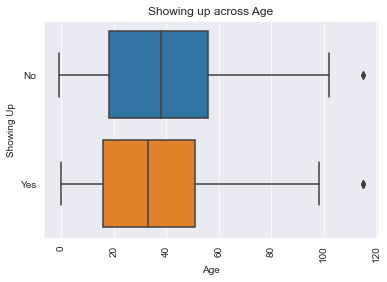

In [21]:
sns.boxplot(x= 'Age', y='No_show', data=df)
plt.xticks(rotation=90)
plt.title("Showing up across Age")
plt.xlabel("Age")
plt.ylabel("Showing Up");


Majority of patients who showed up were between ages 0 and 51 while those who didn't were between 0 and 56. The Boxplot also shows some outliers across both groups, with some patients above 100 years old.

In [22]:
# Statistical test for difference in mean
# perform two sample z-test
x = ztest(x, y, value=0)
print("The test statistics for the ages of the 2 groups is {}".format(x[0]))
print("The p-value is {}".format(x[1]))

The test statistics for the ages of the 2 groups is -20.089649945046602
The p-value is 9.090066569270412e-90


Our null hypothesis states that there's no difference in the mean ages of those who showed up for the appointment and those who didn't. The alternate hypothesis states there's difference.

Since this p-value is less than .05 (threshold), we have sufficient evidence to reject the null hypothesis. In other words, the mean age is significantly different between the two groups.

### What are the proportions of patients showing up by Gender ?

In [23]:
# Calculating the proportion within groups
counts = group('Gender')
totals = df.groupby('Gender').count()['Age']
gender_prop = counts / totals 
gender_prop = pd.DataFrame(gender_prop)
gender_prop

Age
Gender No_show          
F      No       0.796854
       Yes      0.203146
M      No       0.800321
       Yes      0.199679

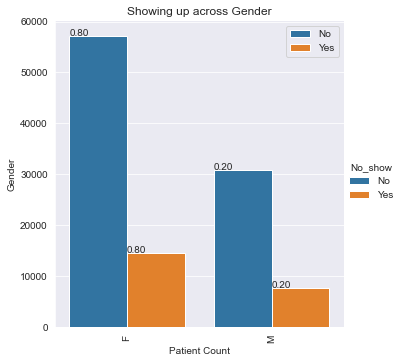

In [24]:
# Plotting a countplot visual
Gender_order = ['F' ,'M'] 
hue_order = ['No', 'Yes']
bar_order = product(Gender_order, hue_order)

catp = sns.catplot(data=df, kind='count', 
                   x='Gender', hue='No_show', 
                   order = Gender_order, hue_order = hue_order )
plt.xticks(rotation=90)
plt.title("Showing up across Gender")
plt.xlabel("Patient Count")
plt.ylabel("Gender")
plt.legend();

# The code below is to add the proportions to the bar.
spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    Gender_total = len(df[df['Gender']==spot[1][0]])
    Gender_No_show_total = len(df[(df['Gender']==spot[1][0]) & 
        (df['No_show']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(Gender_No_show_total/Gender_total))

> There are little difference in the proportion of patients who showed up for appointment by gender. Approximately 80% didn't show up across both genders.

###  Did patient who received text message show up for appointment?

In [25]:
# Calculating the proportion within groups
counts = group('SMS_received')
totals = df.groupby('SMS_received').count()['Age']
sms_prop = counts / totals 
sms_prop = pd.DataFrame(sms_prop)
sms_prop

Age
SMS_received No_show          
0            No       0.832967
             Yes      0.167033
1            No       0.724255
             Yes      0.275745

> About 28% of patients who received SMS showed up for the appointment as against 17% who didn't receive SMS but showed up for appointment.
> Conversely, patients who received SMS and didn't show were 25698 (72%).

### Correlation

In [26]:
# To see correlation amongst variable
corrMatrix = df.corr()
corrMatrix

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Date_diff
PatientId,1.000000,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001090
Age,-0.004139,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.032707
Scholarship,-0.002880,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.030076
Hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.018750
Diabetes,0.001605,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.028082
Alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.037822
Handicap,-0.007916,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.019534
SMS_received,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.388193
Date_diff,-0.001090,0.032707,-0.030076,-0.018750,-0.028082,-0.037822,-0.019534,0.388193,1.000000


> Correlation between variables have ranged from low to moderate. 
* Age and Hypertension have a moderate positive correlation.
* Handicap and SMS_received have a low negative correlation.

<a id='conclusions'></a>
## Conclusions



We can conclude that majority of patients have failed to show up when scheduled for appointment. Although, more proportions of patients with a time difference (scheduled date to appointment date) of more than 14 days have shown up for their appointment.

From our EDAs, the age distribution across groups (showed and no-show) shows little difference, but the z test for difference of mean showed that there was difference in the means of both group. The statistical tests provided a mechanism to make a quantitative decision on the ages of both groups. We concluded by saying that there was difference in the mean ages of those who showed up for appointments and those who didn't.

Across gender, distributions and proportions also looked similar. Further tests can also be carried out to make decisions.

The proportions of patients who received SMS and didn't show up were relatively lower to those that didn't receive. 72% of patients that received SMS didn't come while 82% of those who didn't receive SMS didn't make the appointment.

#### Improvements
* A regression model can be built to predict showing up using the features available. After fitting a model, we can then estimate the significant variables.

<a id='limitations'></a>
## Limitations

* No statistical tests was performed to test the difference in proportions
* No test was performed for causation
* No specific variable was collected to show exact reason for absence which would help with causation analysis.